## <b>Packages</b>

In [1]:
import pandas as pd
from src import DATA_DIR
import datetime as dt

In [81]:
# python ######################################################################
import sys
import os
import datetime

# basics ######################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# widgets #####################################################################
import ipywidgets as widgets
from ipywidgets import interact

# process mining ##############################################################
import pm4py

# object.log
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.importer.xes import importer as xes_importer

# object.conversion
from pm4py.objects.conversion.dfg import converter as dfg_converter
from pm4py.objects.conversion.process_tree import converter as pt_converter
from pm4py.objects.conversion.wf_net.variants import to_bpmn, to_process_tree


# algo.discovery
from pm4py.algo.discovery.alpha import variants
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.correlation_mining import algorithm as correlation_miner
from pm4py.algo.discovery.temporal_profile import algorithm as temporal_profile_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualizer

# algo.conformance
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
# vizualization
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer


# util
from pm4py.util import vis_utils


# Define directories
from src import DATA_DIR, IMAGE_DIR

import warnings
warnings.filterwarnings("ignore")

## Calculates TimeBetweenEvents

In [3]:
#dataset = pd.read_excel(DATA_DIR / "Datasets" / "Orders.xlsx")
dataset = pd.read_excel('./src/Datasets/Orders.xlsx')
#dataset = dataset.iloc[:20000, :]

In [4]:
dataset.columns = ['Case_ID', 'Activity', 'Timestamp', 'Doc_type', 'Area_ID', 'Area_name', 'Cust_ID', 'Cust_code',
                  'Cust_desc', 'User_ID', 'Marketer_ID', 'Marketer_name', 'Ret_status', 'Ship_ID', 'Dist_ID', 'Dist_name',
                  'Payment_type', 'Payment_desc']

In [5]:
dataset.head()

,Case_ID,Activity,Timestamp,Doc_type,Area_ID,Area_name,Cust_ID,Cust_code,Cust_desc,User_ID,Marketer_ID,Marketer_name,Ret_status,Ship_ID,Dist_ID,Dist_name,Payment_type,Payment_desc
0,100989739,سفارش فروش,1400/07/01 08:11:44,ZO20,202012,منطقه10,14021788,1,خرده فروشي,VARANEGAR,E5700979,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد
1,100989739,تاييد سرپرست,1400/07/01 11:38:51,ZO20,202012,منطقه10,14021788,1,خرده فروشي,A_KESHAVARZ,E5700979,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد
2,100989739,دستور تحويل,1400/07/01 12:48:12,ZLF3,202012,منطقه10,14021788,1,خرده فروشي,F_ASHNAGAR,E5700979,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد
3,100989739,سند حمل,1400/07/01 15:15:40,ZP01,202012,منطقه10,14021788,1,خرده فروشي,H_FALAH,E5700979,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد
4,100989739,دريافت تور,1400/07/03 06:59:57,ZP01,202012,منطقه10,14021788,1,خرده فروشي,H_FALAH,E5700979,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد


In [6]:
import jdatetime as jd

In [7]:
dataset['Date'] = dataset.Timestamp.apply(lambda x: str(x).split(' ')[0])
dataset['Time'] = dataset.Timestamp.apply(lambda x: str(x).split(' ')[1])

In [8]:
dataset['Year'] = dataset.Date.apply(lambda x: str(x).split('/')[0])
dataset['Month'] = dataset.Date.apply(lambda x: str(x).split('/')[1])
dataset['Day'] = dataset.Date.apply(lambda x: str(x).split('/')[2])
dataset['Hour'] = dataset.Time.apply(lambda x: str(x).split(':')[0])
dataset['Minute'] = dataset.Time.apply(lambda x: str(x).split(':')[1])
dataset['Second'] = dataset.Time.apply(lambda x: str(x).split(':')[2])

In [9]:
#converting the date to gregorian 
dataset['Start_Timestamp'] = dataset.apply(lambda row: jd.datetime(
    int(row['Year']),
    int(row['Month']),
    int(row['Day']),
    int(row['Hour']),
    int(row['Minute']),
    int(row['Second'])
).togregorian(), axis=1)

In [36]:
log = dataset[['Case_ID', 'Activity', 'Start_Timestamp']]
log.head()

,Case_ID,Activity,Start_Timestamp
0,100989739,سفارش فروش,2021-09-23 08:11:44
1,100989739,تاييد سرپرست,2021-09-23 11:38:51
2,100989739,دستور تحويل,2021-09-23 12:48:12
3,100989739,سند حمل,2021-09-23 15:15:40
4,100989739,دريافت تور,2021-09-25 06:59:57


In [12]:
log.Start_Timestamp = pd.to_datetime(log.Start_Timestamp)

log.sort_values(['Case_ID', 'Start_Timestamp'], inplace=True)

log['End_Timestamp'] = log.Start_Timestamp.shift(-1)
log['Shifted_CaseID'] = log.Case_ID.shift(-1)
log['Next_Event'] = log.Activity.shift(-1)


log['TimeBetweetEvents'] = (log.End_Timestamp - log.Start_Timestamp)
log.TimeBetweetEvents = log.TimeBetweetEvents.dt.total_seconds()


log.loc[log.Case_ID != log.Shifted_CaseID, 'TimeBetweetEvents'] = 0
log.loc[log.Case_ID != log.Shifted_CaseID, 'Next_Event'] = 'End'

In [13]:
log.head()

,Case_ID,Activity,Start_Timestamp,End_Timestamp,Shifted_CaseID,Next_Event,TimeBetweetEvents
0,100989739,سفارش فروش,2021-09-23 08:11:44,2021-09-23 11:38:51,100989739.0,تاييد سرپرست,12427.0
1,100989739,تاييد سرپرست,2021-09-23 11:38:51,2021-09-23 12:48:12,100989739.0,دستور تحويل,4161.0
2,100989739,دستور تحويل,2021-09-23 12:48:12,2021-09-23 15:15:40,100989739.0,سند حمل,8848.0
3,100989739,سند حمل,2021-09-23 15:15:40,2021-09-25 06:59:57,100989739.0,دريافت تور,143057.0
4,100989739,دريافت تور,2021-09-25 06:59:57,2021-09-25 14:17:23,100989739.0,ارسال تور,26246.0


## EDA

In [55]:
log.shape

(99973, 7)

In [56]:
log.dtypes

Case_ID                           object
Activity                          object
Start_Timestamp      datetime64[ns, UTC]
case:concept:name                 object
concept:name                      object
time:timestamp       datetime64[ns, UTC]
start_timestamp      datetime64[ns, UTC]
dtype: object

In [57]:
#Convert data
#log_csv = dataframe_utils.convert_timestamp_columns_in_df(log_csv)
#log_csv.head()

In [60]:
_columns = ['case:concept:name', 'concept:name', 'time:timestamp']
pd.DataFrame(
    {
        'variable': _columns, 
        'unique values': [log[col].nunique() for col in _columns],
        'fraction': [round(log[col].nunique() / log.shape[0], 2) for col in _columns], 
    }
).set_index('variable')

,unique values,fraction
variable,,
case:concept:name,12603,0.13
concept:name,8,0.00
time:timestamp,41107,0.41


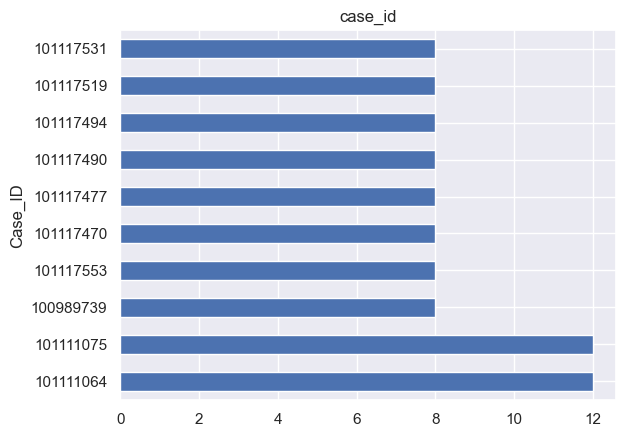

In [62]:
#Plot the top 10 of cases frequency
log.Case_ID.value_counts()[:10].plot(y='case_id', kind='barh', title='case_id')
plt.show()

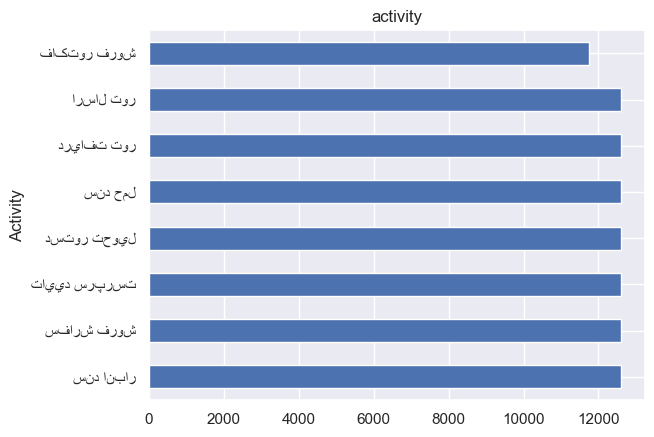

In [64]:
#Plot the activities frequency
log.Activity.value_counts().plot(y='activity', kind='barh', title='activity')
plt.show()

In [67]:
log.Start_Timestamp.nunique()

41107

In [70]:
# Multiple occurences: timestamp
pd.DataFrame(log.Start_Timestamp.value_counts()).head(10)

,count
Start_Timestamp,
2021-10-10 08:54:21+00:00,52
2021-10-09 15:45:56+00:00,52
2021-10-07 16:03:37+00:00,52
2021-09-29 15:19:45+00:00,45
2021-10-16 14:25:15+00:00,44
2021-10-16 11:23:57+00:00,44
2021-10-14 15:34:23+00:00,44
2021-10-04 14:27:28+00:00,44
2021-09-26 17:17:04+00:00,43


In [71]:
def activity_duration(
    event_log: pd.DataFrame, 
    case_var: str, 
    event_var: str, 
    timestamp_var: str, 
    duration: str ='h'
) -> pd.DataFrame:
    
    """
    Returns a dataframe with activity durations (i.e. 'arc' performance decorators).
    By default duration is set to hours (h).
    Use 's' for seconds, 'D' for days and 'W' for weeks.
    """
    
    event_log = event_log.rename(columns = {event_var:'event_from', timestamp_var:'time_from'})

    # Method 1
    data = {}

    # # Method 2
    # activity_duration_df = pd.DataFrame()
    
    
    groups = event_log.groupby(case_var)
    for name, group in groups:
        arc = group.sort_values('time_from')
        arc['event_to'] = arc['event_from'].shift(-1)
        arc['time_to'] = arc['time_from'].shift(-1)
        arc.dropna(inplace = True)
        duration_var = f'duration ({duration})'
        arc[duration_var] = (arc['time_to'] - arc['time_from']) / np.timedelta64(1, duration)
        
        # Method 1
        data[name] = arc[[case_var, 'event_from', 'event_to', 'time_from', 'time_to', duration_var]]

        # # Method 2
        # arc = arc[[case_var, 'event_from', 'event_to', 'time_from', 'time_to', duration_var]]
        # activity_duration_df = pd.concat([activity_duration_df, arc], axis=0)
    return pd.concat(data.values()).set_index(case_var)

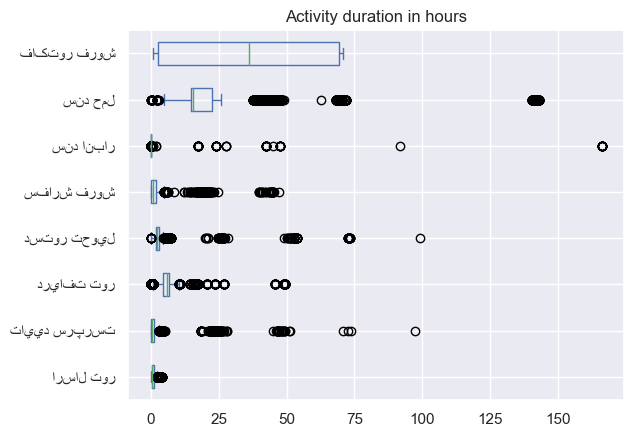

In [72]:
ad_df = activity_duration(log, 'Case_ID', 'Activity', 'Start_Timestamp')
ad_df = ad_df[['event_from', 'event_to', 'duration (h)']].reset_index()
ad_df = ad_df.pivot(columns='event_from', values='duration (h)')
ad_df.plot(kind='box', vert=False, title='Activity duration in hours')
plt.show()

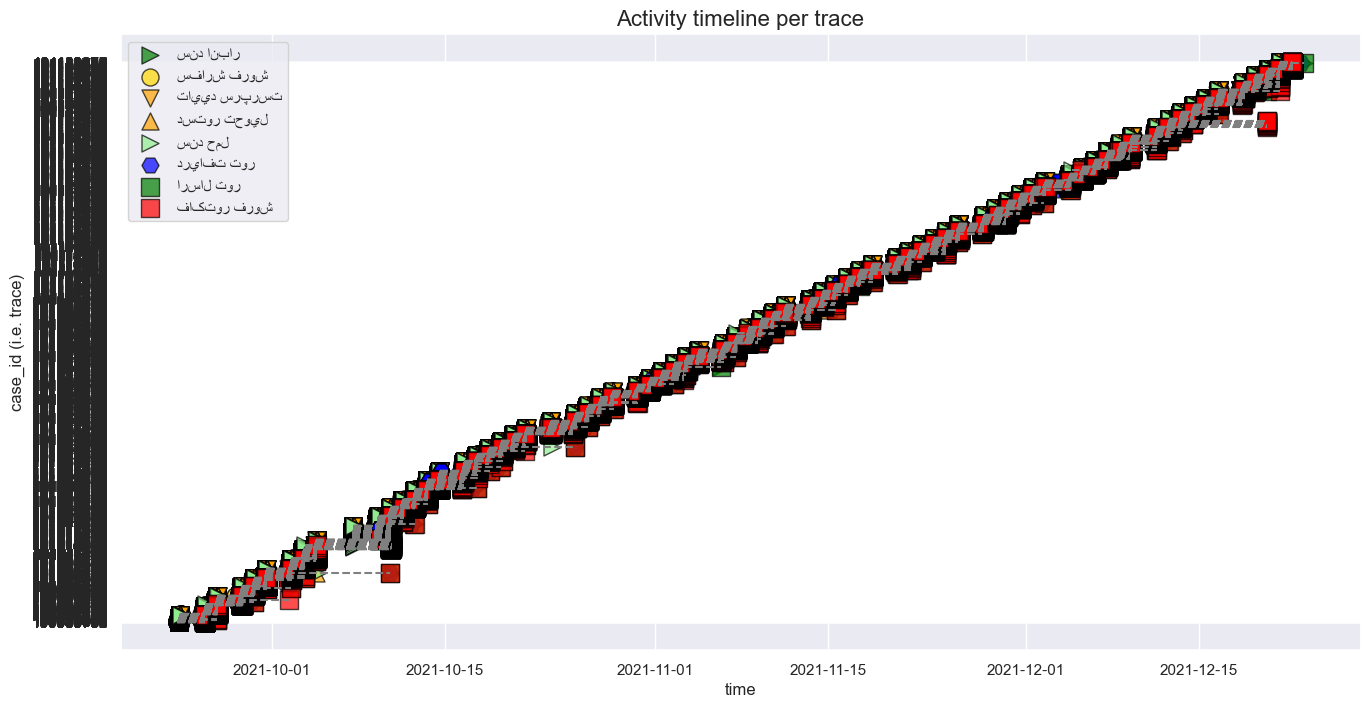

In [75]:
# Settings
activity = {
    'سند انبار': ('>', 'green'), 
    'سفارش فروش': ('o', 'gold'), 
    'تاييد سرپرست': ('v', 'orange'), 
    'دستور تحويل': ('^', 'orange'), 
    'سند حمل': ('>', 'lightgreen'), 
    'دريافت تور': ('H', 'blue'), 
    'ارسال تور': ('s', 'green'), 
    'فاکتور فروش': ('s', 'red'),
}


# Figure
fig, ax = plt.subplots(figsize=(16, 8))


# Timelines
log_agg_by_case = log.groupby('Case_ID').agg(time_start = ('Start_Timestamp', min),
                                                     time_end = ('Start_Timestamp', max)).reset_index()
log_agg_by_case
for timeline in log_agg_by_case.itertuples(index=False):
    plt.hlines(timeline.Case_ID, timeline.time_start, timeline.time_end, 
               colors = 'grey', linestyles = 'dashed')

# Activities
for act in activity.keys():
    ax.scatter(log.loc[log.Activity == act, 'Start_Timestamp'], 
               log.loc[log.Activity == act, 'Case_ID'],
               marker = activity[act][0],
               color = activity[act][1], 
               s = 150, 
               alpha = .7,
               label = act,
               edgecolors = 'black',
              )

ax.set_title('Activity timeline per trace', fontsize=16)
ax.set_xlabel('time')
ax.set_ylabel('case_id (i.e. trace)')
ax.legend()
ax.grid(True)

plt.show()

<br></br>
### <b>2.3.13. Frequency Table</b>

In [84]:
def dfg_frequency_matrix(
    event_log: pd.DataFrame, 
    case_var: str, 
    event_var: str, 
    timestamp_var: str
) -> pd.DataFrame:
    
    """
    Return a directly-follows graph frequency matrix based on the traces in the event log.
    Row events (i.e. the index) are events 'from' and column events are the events 'to'.
    """
    
    # event log
    log = event_log[[case_var, event_var, timestamp_var]]
    
    # initiate matrix
    events = log[event_var].unique()
    matrix = pd.DataFrame(columns=events, index=events).fillna(0)
    
    # groupby case_var
    groups = log.groupby(case_var)
    
    # loop through case groups
    for name, group in groups:
        event = group.sort_values(timestamp_var)\
                     .drop([case_var, timestamp_var], axis = 1)\
                     .rename(columns = {event_var:'event_from'})

        event['event_to'] = event['event_from'].shift(-1)
        event.dropna(inplace = True)
        
        # loop through traces
        for trace in event.itertuples(index = False):
            matrix.at[trace.event_from, trace.event_to] += 1

    return matrix.replace(0, np.nan)

In [86]:
def frequency_table(dfg_frequency_matrix: pd.DataFrame) -> pd.DataFrame:
    
    """
    Returns an directly-follows graph frequency table
    """
    
    arcs = list()
    
    for row in dfg_frequency_matrix.index:
        for col in dfg_frequency_matrix.columns:
            if not np.isnan(dfg_frequency_matrix.at[row, col]):
                arcs.append((row, col, dfg_frequency_matrix.at[row, col]))
    
    arc_freq = pd.DataFrame(arcs, columns = ['event_from', 'event_to', 'frequency'])\
    .set_index(['event_from', 'event_to'])
    
    return arc_freq

In [87]:
frequencey_matrix = dfg_frequency_matrix(log, 'Case_ID', 'Activity', 'Start_Timestamp')
af_df = frequency_table(frequencey_matrix).reset_index()
af_df

,event_from,event_to,frequency
0,سفارش فروش,تاييد سرپرست,12603.0
1,تاييد سرپرست,دستور تحويل,12603.0
2,دستور تحويل,سند حمل,12598.0
3,دستور تحويل,دريافت تور,5.0
4,سند حمل,سفارش فروش,5.0
5,سند حمل,دريافت تور,12598.0
6,دريافت تور,ارسال تور,12603.0
7,ارسال تور,سند انبار,12603.0
8,سند انبار,سند انبار,2.0
9,سند انبار,فاکتور فروش,11746.0


<br></br>
### <b>2.3.14. Extract Activities Duration From Events</b>

In [91]:
ad_df = activity_duration(log, 'Case_ID', 'Activity', 'Start_Timestamp').loc[:, ['event_from', 'event_to', 'duration (h)']]
ad_df = ad_df.groupby(by = ['event_from', 'event_to']).agg(
    mean_duration = ('duration (h)', 'mean')
).reset_index()
ad_df

,event_from,event_to,mean_duration
0,ارسال تور,سند انبار,0.776077
1,تاييد سرپرست,دستور تحويل,1.171383
2,دريافت تور,ارسال تور,5.796661
3,دستور تحويل,دريافت تور,2.010444
4,دستور تحويل,سند حمل,2.752147
5,سفارش فروش,تاييد سرپرست,1.525684
6,سند انبار,سند انبار,1.996250
7,سند انبار,فاکتور فروش,0.319522
8,سند حمل,دريافت تور,23.510841
9,سند حمل,سفارش فروش,17.974056


<br></br>
### <b>2.3.15. Frequency-Duration Table</b>

In [92]:
ad_df = activity_duration(log, 'Case_ID', 'Activity', 'Start_Timestamp').loc[:, ['event_from', 'event_to', 'duration (h)']]

ad_df = ad_df.groupby(by = ['event_from', 'event_to']).agg(
    mean_duration = ('duration (h)', 'mean'),
    total_duration = ('duration (h)', 'sum'),
    std_duration = ('duration (h)', 'std'),
    count = ('event_from', 'count')
).reset_index()

# ad_df.sort_values('total_duration', ascending=False)
ad_df

,event_from,event_to,mean_duration,total_duration,std_duration,count
0,ارسال تور,سند انبار,0.776077,9780.896389,0.630169,12603
1,تاييد سرپرست,دستور تحويل,1.171383,14762.936389,3.642978,12603
2,دريافت تور,ارسال تور,5.796661,73055.320278,4.722683,12603
3,دستور تحويل,دريافت تور,2.010444,10.052222,1.495084,5
4,دستور تحويل,سند حمل,2.752147,34671.554167,3.821181,12598
5,سفارش فروش,تاييد سرپرست,1.525684,19228.193889,3.052040,12603
6,سند انبار,سند انبار,1.996250,3.992500,0.071693,2
7,سند انبار,فاکتور فروش,0.319522,3753.103889,5.789051,11746
8,سند حمل,دريافت تور,23.510841,296189.579167,18.976553,12598
9,سند حمل,سفارش فروش,17.974056,89.870278,0.983692,5


<br></br>
### <b>2.3.16. Frequency Table Heatmap</b>

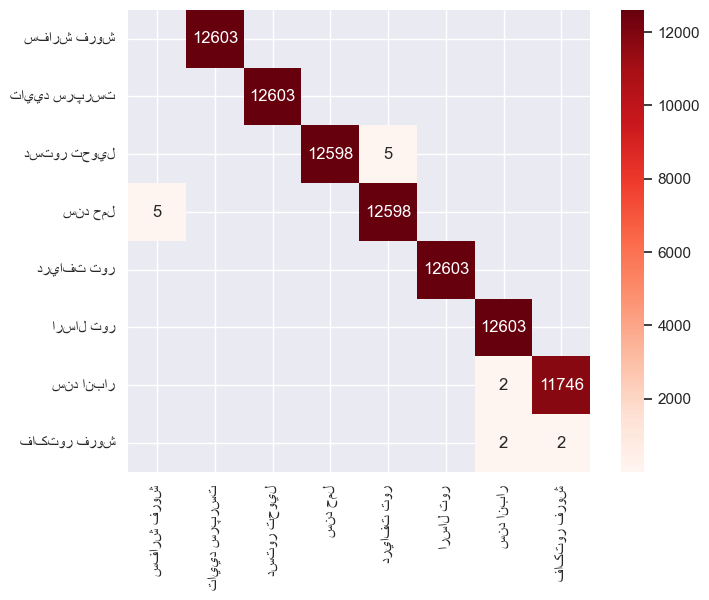

In [93]:
dfg_freq_matrix = dfg_frequency_matrix(log, 'Case_ID', 'Activity', 'Start_Timestamp')
sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(dfg_freq_matrix, annot=True, fmt='.0f', cmap='Reds', square=True)
plt.show()

<br></br>
### <b>2.3.17. Activities Duration Heatmap</b>

In [94]:
def dfg_performance_matrix(
    event_log: pd.DataFrame, 
    case_var: str, 
    event_var: str, 
    timestamp_var: str, 
    duration: str ='h'
) -> pd.DataFrame:
    
    """
    Return a directly-follows graph duration matrix based on the traces in the event log.
    Row events (i.e. the index) are events 'from' and column events are the events 'to'.
    By default duration is set to hours (h). Use 's' for seconds, 'D' for days and 'W' for weeks.
    """
    
    # event log
    log = event_log[[case_var, event_var, timestamp_var]]
    
    # initiate matrix
    events = log[event_var].unique()
    matrix = pd.DataFrame(columns=events, index=events)
    
    # groupby case_var
    groups = log.groupby(case_var)
    
    # loop through case groups
    for group in groups:
        event = group[1].sort_values(timestamp_var)\
                        .rename(columns = {event_var:'event_from', timestamp_var:'time_begin'})

        event['event_to'] = event['event_from'].shift(-1)
        event['time_end'] = event['time_begin'].shift(-1)
        event['duration'] = (event['time_end'] - event['time_begin']) / np.timedelta64(1, duration)
        event.dropna(inplace = True)
        
        # loop through traces
        for row in event.itertuples(index = False):
            matrix.at[row.event_from, row.event_to] = np.nansum([matrix.at[row.event_from, row.event_to], row.duration])
    
    return matrix.astype(float)

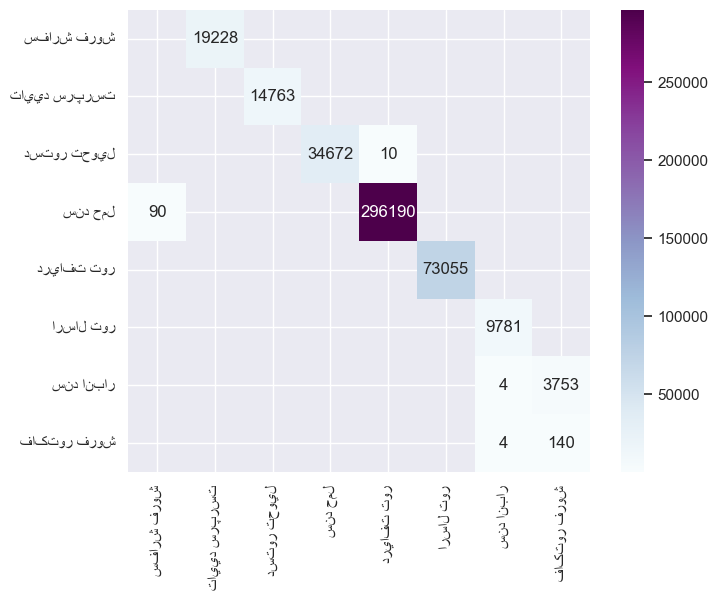

In [96]:
# Directly-Follows Graph total duration heapmap (in hours)
dfg_perf_matrix = dfg_performance_matrix(log, 'Case_ID', 'Activity', 'Start_Timestamp', duration='h')
sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(dfg_perf_matrix, annot=True, fmt='.0f', cmap='BuPu', square=True)
plt.show()

## Generate Variants

In [14]:
log.sort_values(['Start_Timestamp'], inplace=True)

variants = log.groupby('Case_ID')['Activity'].apply(tuple).reset_index()

In [15]:
pd.DataFrame(variants.Activity.value_counts()).head(10)

,count
Activity,
"(سفارش فروش, تاييد سرپرست, دستور تحويل, سند حمل, دريافت تور, ارسال تور, سند انبار, فاکتور فروش)",11729
"(سفارش فروش, تاييد سرپرست, دستور تحويل, سند حمل, دريافت تور, ارسال تور, سند انبار)",859
"(سند حمل, سفارش فروش, تاييد سرپرست, دستور تحويل, دريافت تور, ارسال تور, سند انبار, فاکتور فروش)",5
"(سفارش فروش, تاييد سرپرست, دستور تحويل, سند حمل, دريافت تور, ارسال تور, فاکتور فروش, سند انبار)",5
"(تاييد سرپرست, سفارش فروش, دستور تحويل, سند حمل, دريافت تور, ارسال تور, سند انبار, فاکتور فروش)",2
"(سفارش فروش, تاييد سرپرست, دستور تحويل, سند حمل, دريافت تور, ارسال تور, سند انبار, فاکتور فروش, فاکتور فروش, سند انبار, سند انبار, فاکتور فروش)",2
"(سفارش فروش, دستور تحويل, تاييد سرپرست, سند حمل, دريافت تور, ارسال تور, سند انبار, فاکتور فروش)",1


<br><br>
## <b>1.2. Setting</b>

In [16]:
pd.set_option('display.max_rows', 50)

In [17]:
sns.set_theme()

<br><br>
## <b>1.3. Import Event Log</b>

In [39]:
#log = xes_importer.apply(str(DATA_DIR / 'Example/Running_Example/running-example.xes'))

#log = pd.read_csv('./src/Datasets/Orders.xlsx', sep=',')

# in Inductive Mining algorithm, it needs the Case_ID should be string
log.Case_ID = log.Case_ID.apply(str)

pm4py.format_dataframe(
    log,
    case_id = 'Case_ID',
    activity_key = 'Activity',
    timestamp_key = 'Start_Timestamp', 
    timest_format = '%Y-%m-%d %H:%M:%S%z'
#     timestamp_key = 'Start_Timestamp', 
#     timest_format = '%Y-%m-%d'
)

log.head()

,Case_ID,Activity,Start_Timestamp,case:concept:name,concept:name,time:timestamp
0,100989739,سفارش فروش,2021-09-23 08:11:44+00:00,100989739,سفارش فروش,2021-09-23 08:11:44+00:00
1,100989739,تاييد سرپرست,2021-09-23 11:38:51+00:00,100989739,تاييد سرپرست,2021-09-23 11:38:51+00:00
2,100989739,دستور تحويل,2021-09-23 12:48:12+00:00,100989739,دستور تحويل,2021-09-23 12:48:12+00:00
3,100989739,سند حمل,2021-09-23 15:15:40+00:00,100989739,سند حمل,2021-09-23 15:15:40+00:00
4,100989739,دريافت تور,2021-09-25 06:59:57+00:00,100989739,دريافت تور,2021-09-25 06:59:57+00:00


<br></br>
# <b>2. Process Dicovery</b>

<br></br>
## <b>2.1 Alpha Miner</b>

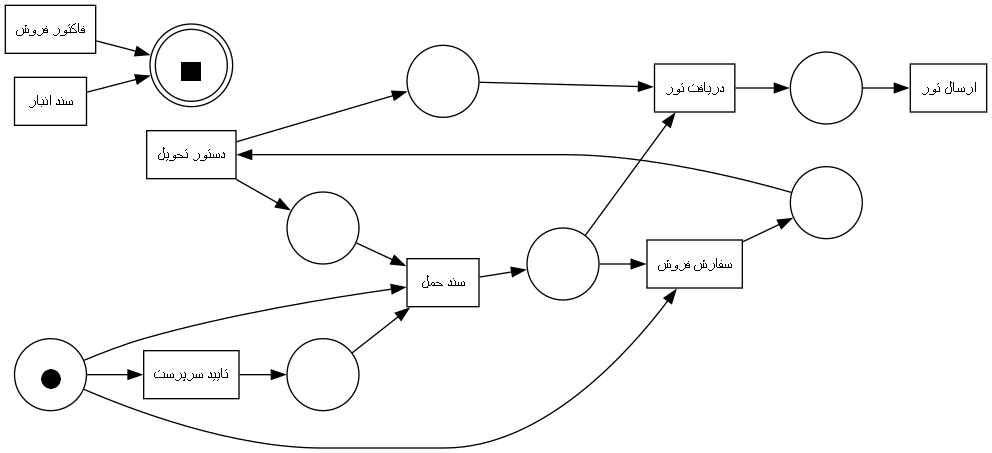

In [21]:
# Miner
petri_net, initial_marking, final_marking = alpha_miner.apply(log, variant=variants.classic)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/alpha_miner_classic_petri_default.png')

# View
pn_visualizer.view(gviz)

<br></br>
### <b>Performance</b>

replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

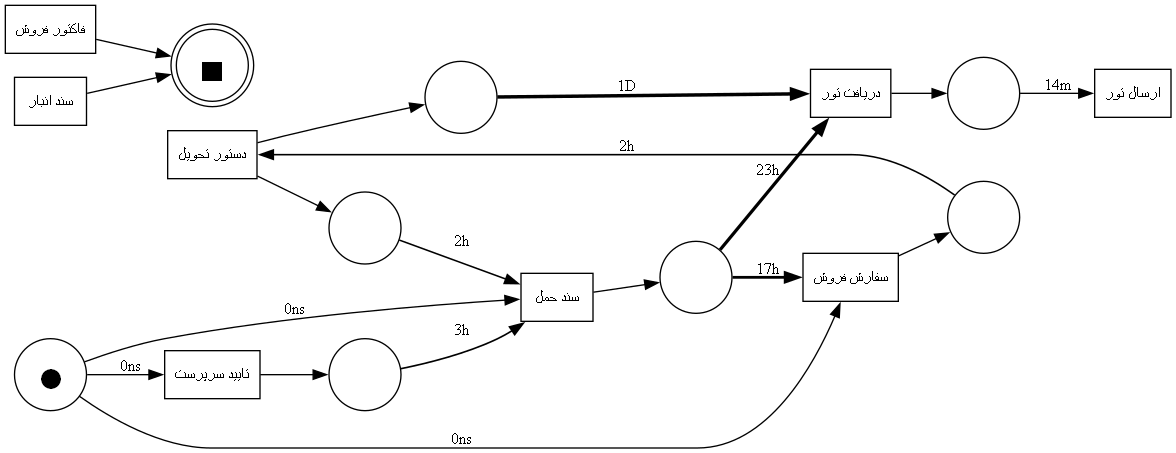

In [22]:
# Miner
petri_net, initial_marking, final_marking = alpha_miner.apply(log, variant=variants.classic)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking, 
                           variant=pn_visualizer.Variants.PERFORMANCE,
                           log=log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/alpha_miner_classic_petri_performance.png')

# View
pn_visualizer.view(gviz)

<br></br>
### <b>Frequency</b>

replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

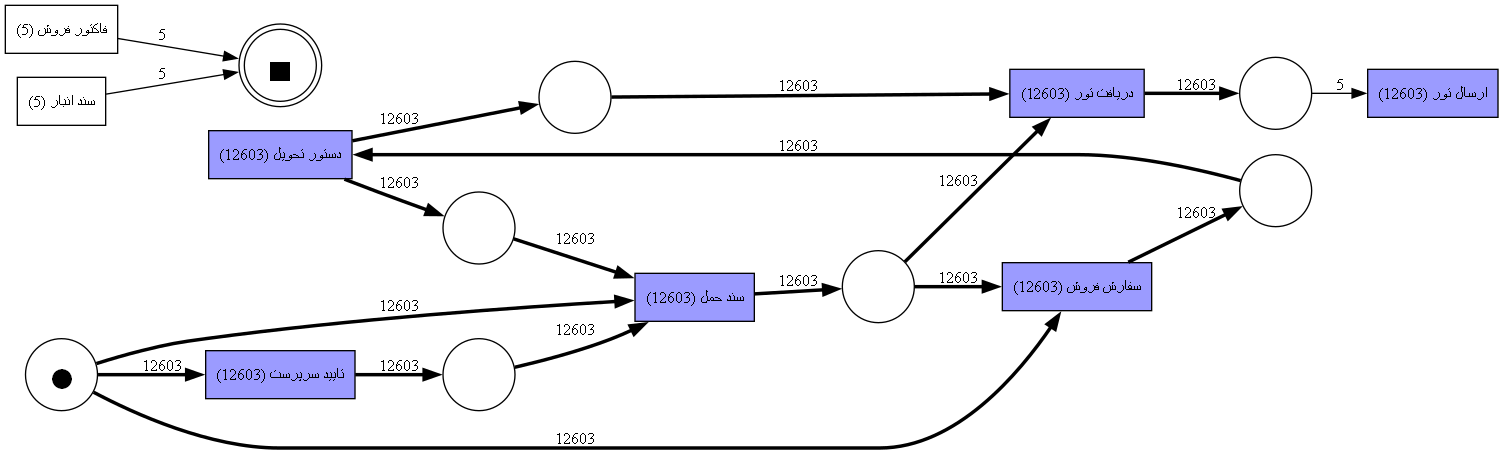

In [23]:
# Miner
petri_net, initial_marking, final_marking = alpha_miner.apply(log, variant=variants.classic)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking, 
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/alpha_miner_classic_petri_frequency.png')

# View
pn_visualizer.view(gviz)

<br></br>
## <b>2.2 Alpha+ Miner</b>

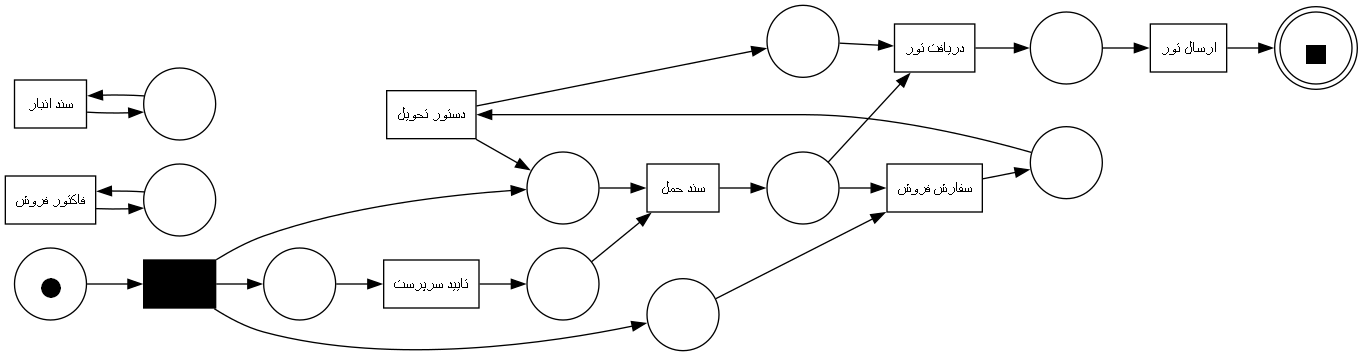

In [24]:
# Miner
petri_net, initial_marking, final_marking = alpha_miner.apply(log, variant=variants.plus)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/alpha_miner_plus_petri_default.png')

# View
pn_visualizer.view(gviz)

<br></br>
### <b>Performance</b>

replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

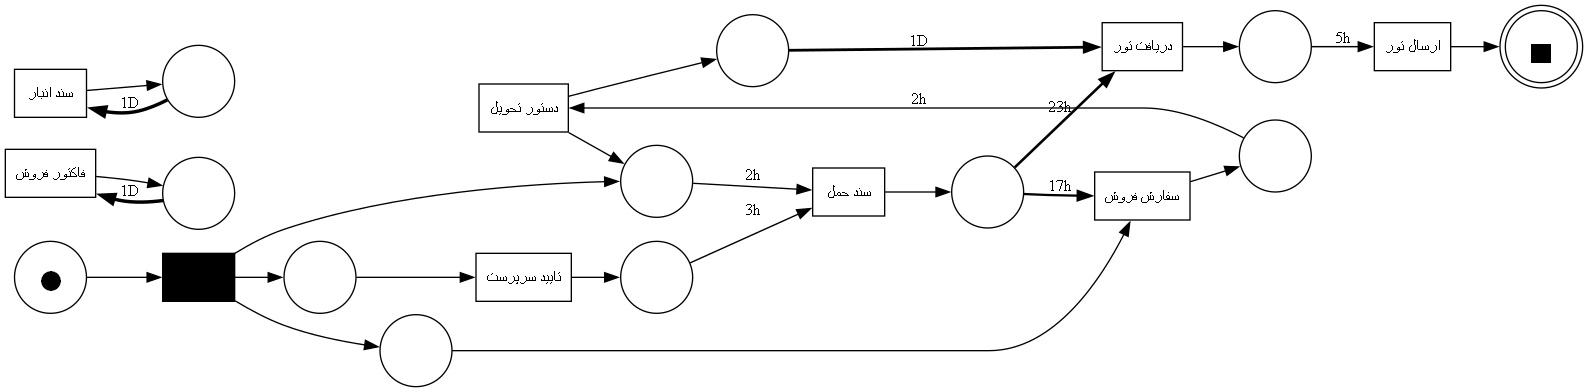

In [25]:
# Miner
petri_net, initial_marking, final_marking = alpha_miner.apply(log, variant=variants.plus)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking, 
                           variant=pn_visualizer.Variants.PERFORMANCE,
                           log=log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/alpha_miner_plus_petri_performance.png')

# View
pn_visualizer.view(gviz)

<br></br>
### <b>Frequency</b>

replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

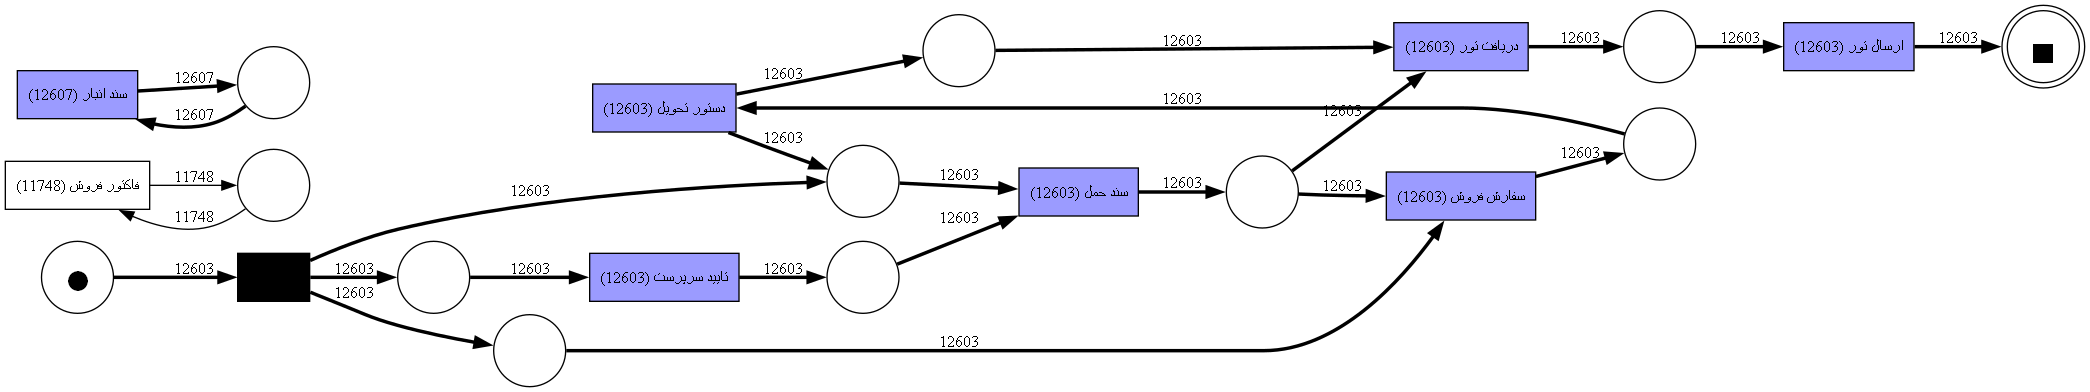

In [26]:
# Miner
petri_net, initial_marking, final_marking = alpha_miner.apply(log, variant=variants.plus)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking, 
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/alpha_miner_plus_petri_frequency.png')

# View
pn_visualizer.view(gviz)

<br></br>
## <b>2.3 Heuristic Miner</b>

<br></br>
### <b>2.3.1. Implicit Default Parameters _ (Performance)</b>

replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

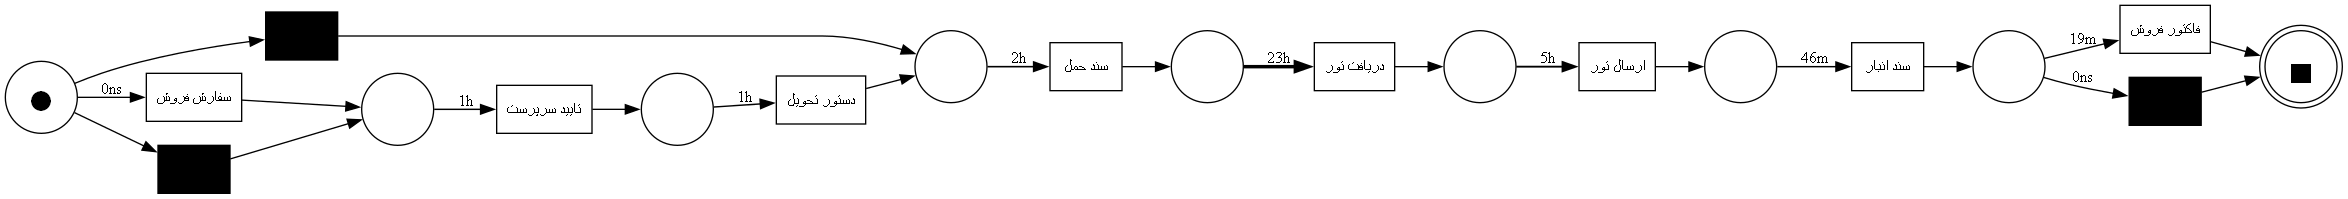

In [27]:
# Miner
petri_net, initial_marking, final_marking = heuristics_miner.apply(log)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking,
                           variant=pn_visualizer.Variants.PERFORMANCE, 
                           log=log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/heuristic_miner_1.png')

# View
pn_visualizer.view(gviz)

<br></br>
### <b>2.3.2. Implicit Default Parameters _ (Frequency)</b>

replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

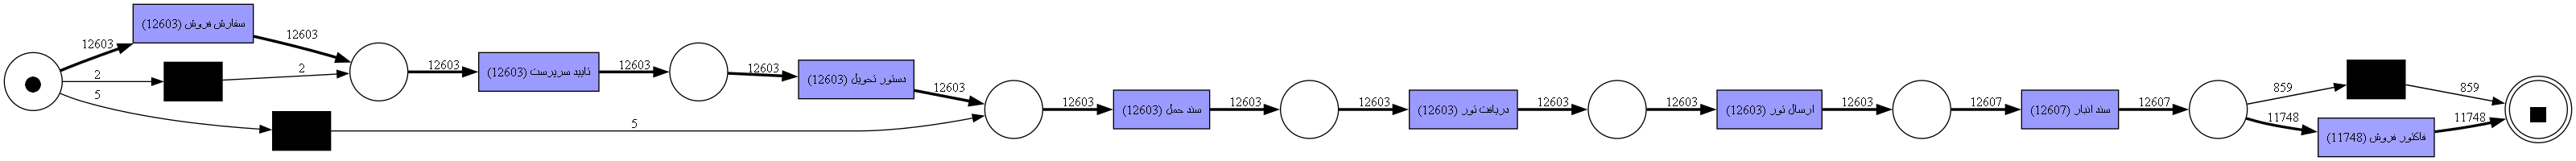

In [28]:
# Miner
petri_net, initial_marking, final_marking = heuristics_miner.apply(log)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking,
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/heuristic_miner_2.png')

# View
pn_visualizer.view(gviz)

<br></br>
### <b>2.3.3. Explicit Default Parameters _ (Performance)</b>

replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

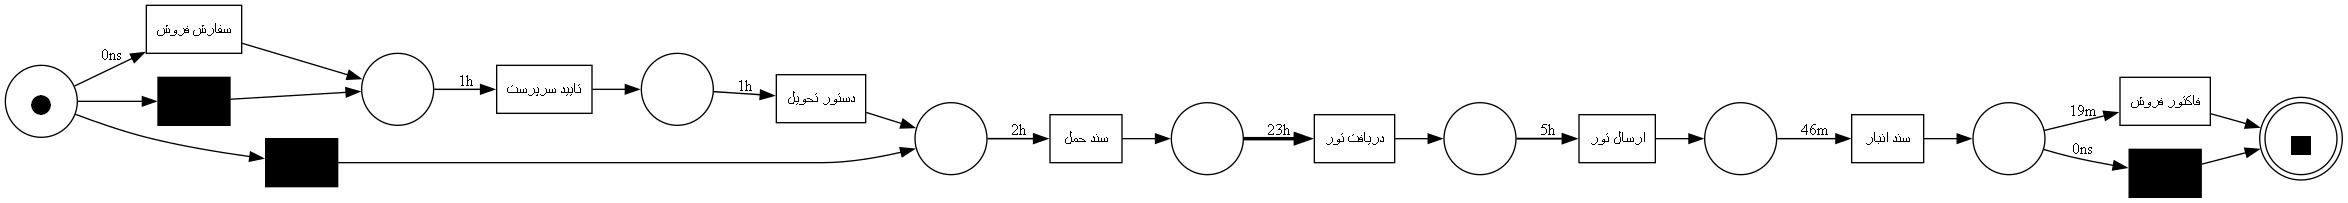

In [29]:
# Parameters
parameters = heuristics_miner.Variants.CLASSIC.value.Parameters

# Miner
petri_net, initial_marking, final_marking = heuristics_miner.apply(
    log,
    parameters={
        parameters.DEPENDENCY_THRESH: 0.5,
        parameters.AND_MEASURE_THRESH: 0.65,
        parameters.LOOP_LENGTH_TWO_THRESH: 0.5
    }
)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking,
                           variant=pn_visualizer.Variants.PERFORMANCE, 
                           log=log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/heuristic_miner_3.png')

# View
pn_visualizer.view(gviz)

<br></br>
### <b>2.3.4. Explicit Default Parameters _ (Frequency)</b>

replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

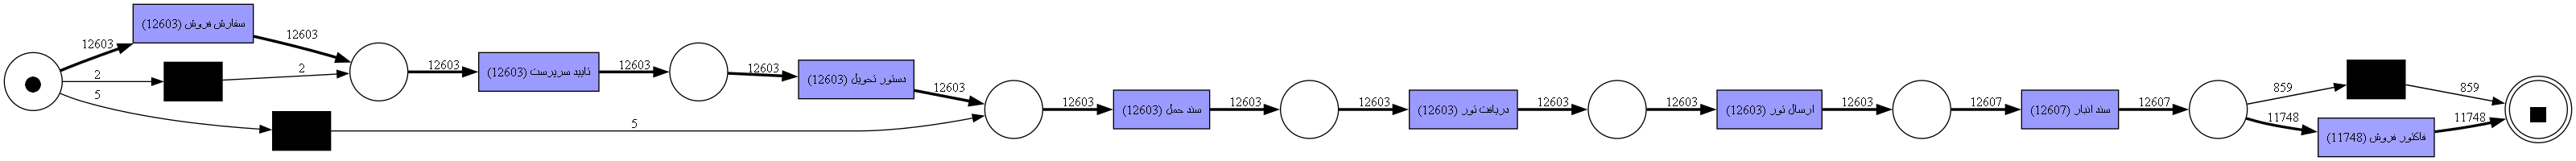

In [30]:
# Parameters
parameters = heuristics_miner.Variants.CLASSIC.value.Parameters

# Miner
petri_net, initial_marking, final_marking = heuristics_miner.apply(
    log,
    parameters={
        parameters.DEPENDENCY_THRESH: 0.5, 
        parameters.AND_MEASURE_THRESH: 0.65,
        parameters.LOOP_LENGTH_TWO_THRESH: 0.5
    }
)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking,
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/heuristic_miner_3.png')

# View
pn_visualizer.view(gviz)

<br></br>
## <b>2.4. Inductive Miner</b>

### <b>2.4.1. Performance</b>

replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

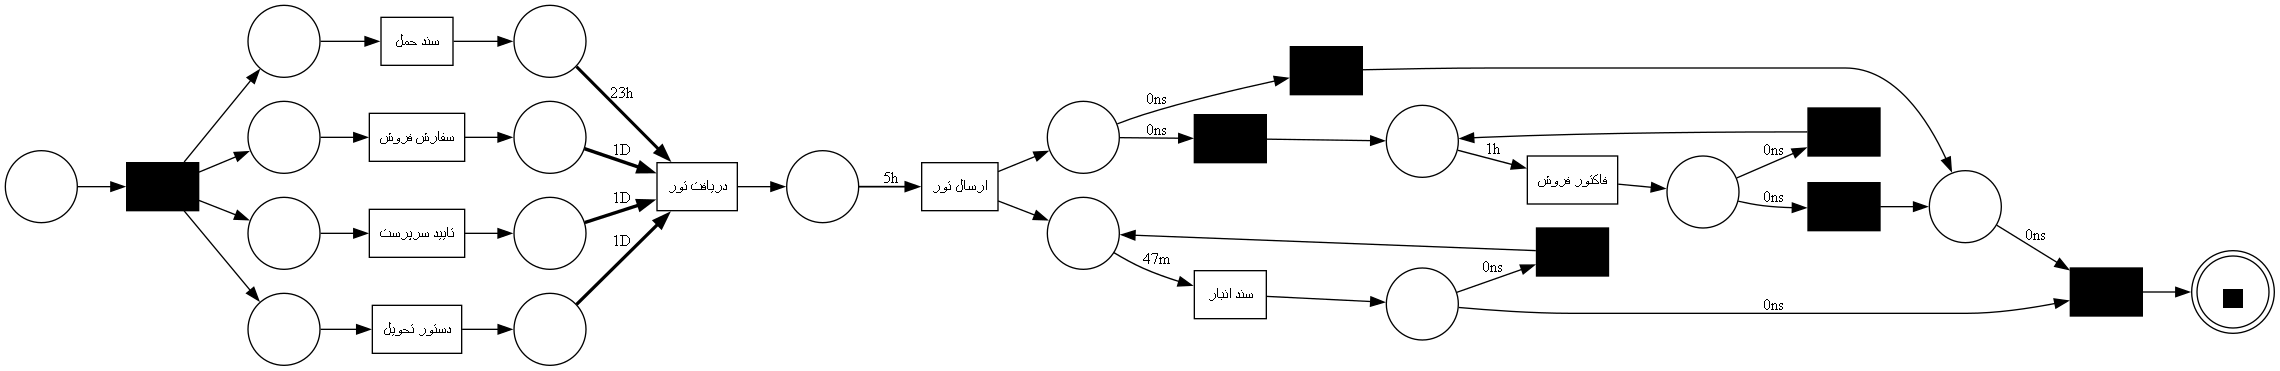

In [33]:
# Miner
petri_net, marking, final_marking = pm4py.discover_petri_net_inductive(log)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking,
                           variant = pn_visualizer.Variants.PERFORMANCE, 
                           log = log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/IM_performance_petri.png')

# View
pn_visualizer.view(gviz)

<br></br>
### <b>2.4.2. Frequency</b>

replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

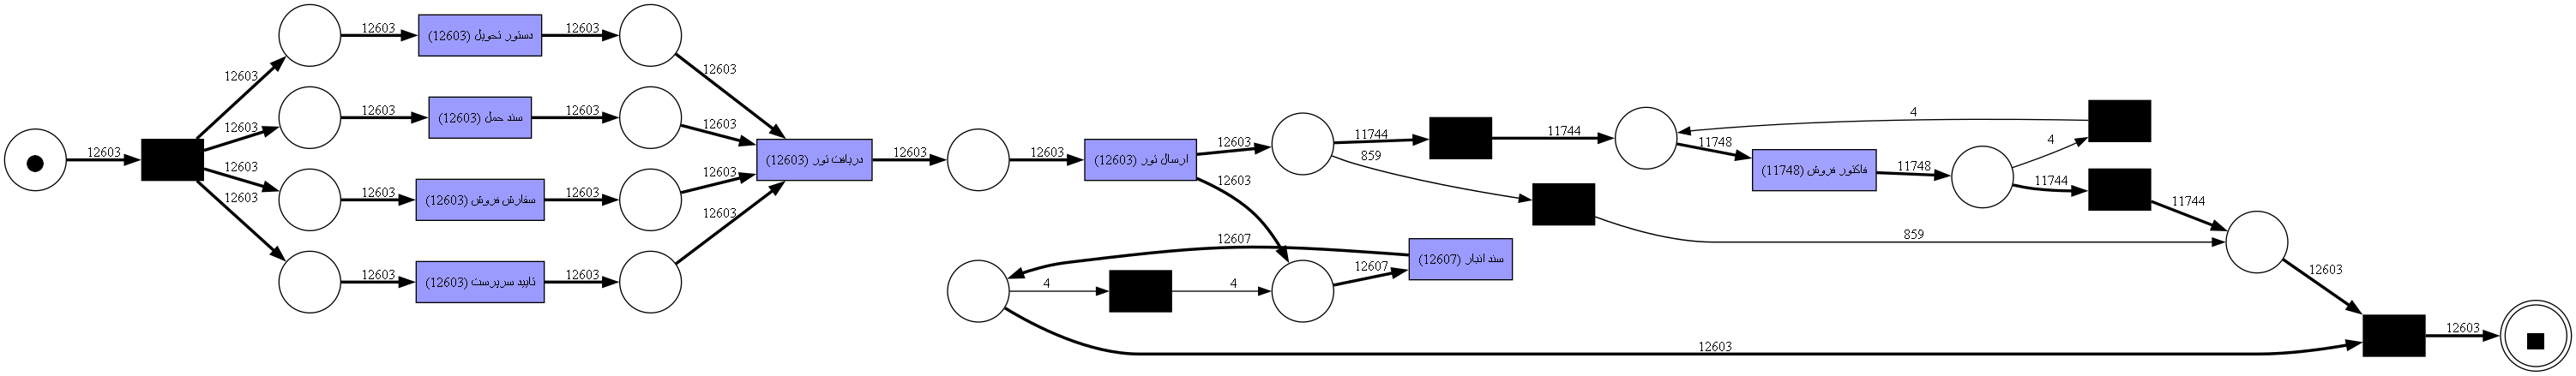

In [32]:
# Miner
petri_net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking,
                           variant = pn_visualizer.Variants.FREQUENCY, 
                           log = log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/IM_frequency_petri.png')

# View
pn_visualizer.view(gviz)

<br></br>
# <b>3. Other Process Map Types<b>

## <b>3.1. Process Tree<b>

### <b>3.1.1. Convert Petri Net to Process Tree<b>

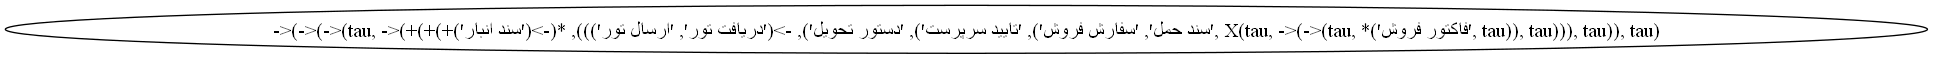

In [40]:
# Inductive Petri Net to process_tree

petri_net, marking, final_marking = pm4py.discover_petri_net_inductive(log)
process_tree = to_process_tree.apply(petri_net, marking, final_marking)
pm4py.view_process_tree(process_tree)

<br></br>
### <b>3.1.2. Convert Process Tree to Petri Net<b>

replaying log with TBR, completed variants ::   0%|          | 0/3 [00:00<?, ?it/s]

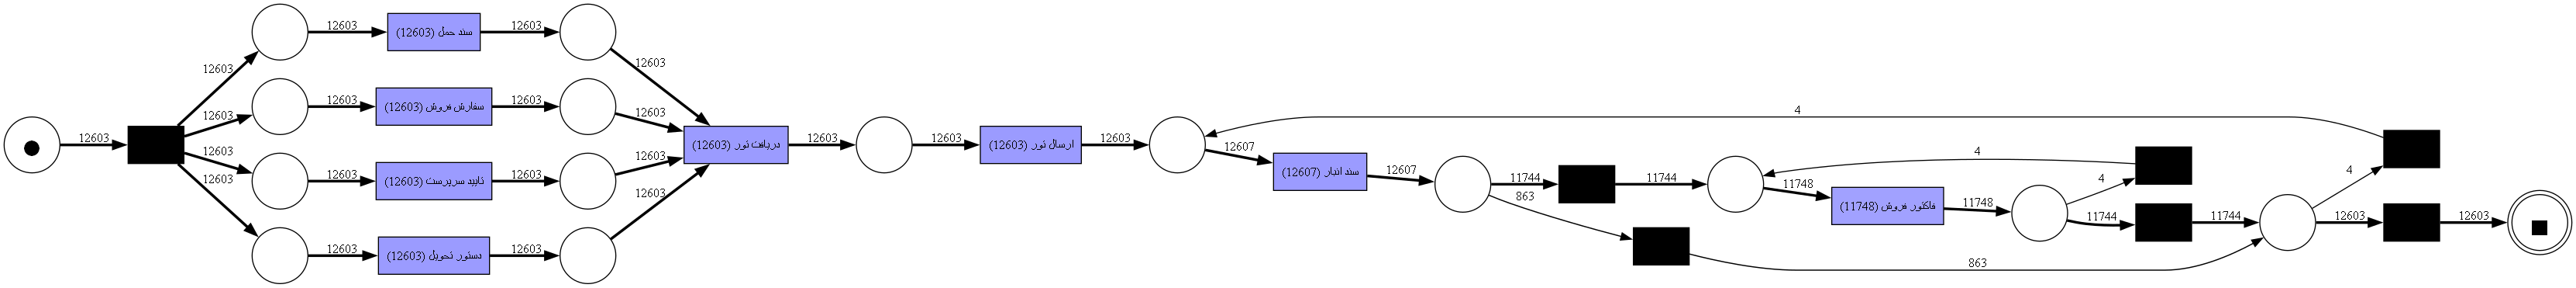

In [41]:
# Miner
tree = pm4py.discover_process_tree_inductive(log)

# Convert the process tree to a petri net
net, initial_marking, final_marking = pt_converter.apply(tree)


# GraphViz
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters={pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: 'png'}, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)

# View
pn_visualizer.view(gviz)

<br></br>
## <b>3.2. BPMN<b>

### <b>3.2.1. Convert Petri Net to BPMN<b>

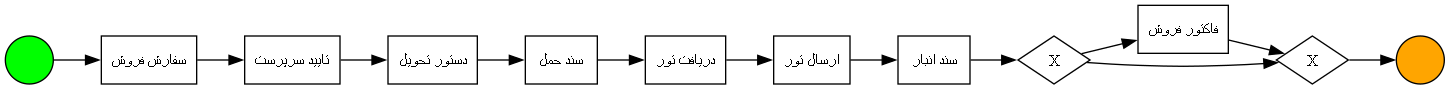

In [42]:
# Heuristics Petri Net to BPMN

petri_net, marking, final_marking = heuristics_miner.apply(log)

bpmn = to_bpmn.apply(petri_net, marking, final_marking)
pm4py.view_bpmn(bpmn)

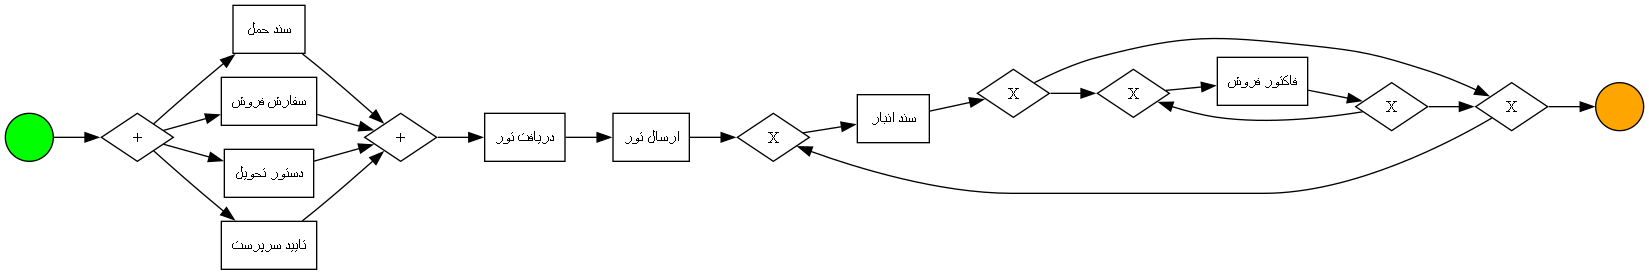

In [43]:
# Inductive Petri Net to BPMN

petri_net, marking, final_marking = pm4py.discover_petri_net_inductive(log)

bpmn = to_bpmn.apply(petri_net, marking, final_marking)
pm4py.view_bpmn(bpmn)

<br></br>
## <b>3.3 Directly-Follows Graph</b>

### <b>3.3.1. Direct extraction of the process map</b>

#### <b>3.3.1.1. Performance<b>

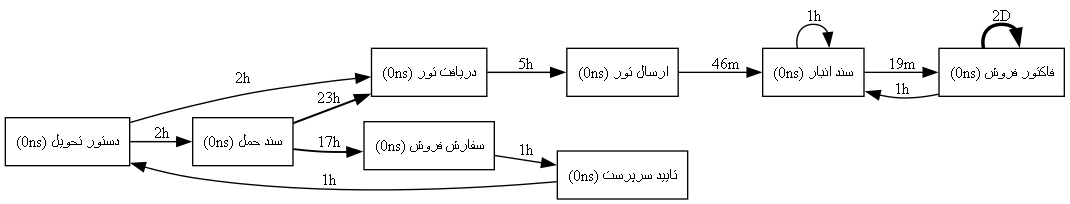

In [44]:
# Miner
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)

# GraphViz
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE)

# Save
dfg_visualization.save(gviz, IMAGE_DIR / 'ProcessDiscovery/dfg_performance.png')

# View
dfg_visualization.view(gviz)

<br></br>
#### <b>3.3.1.2. Frequency<b>

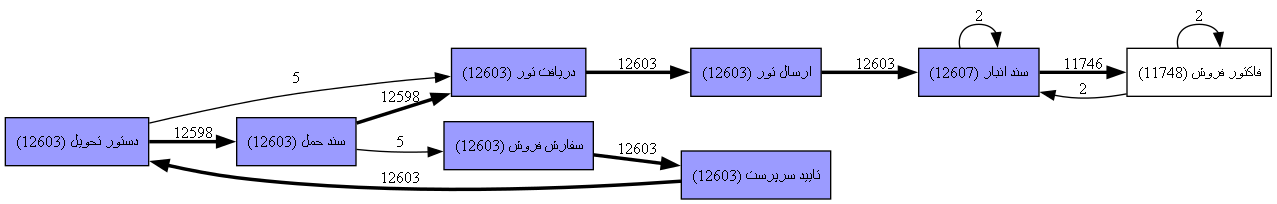

In [45]:
# Miner
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.FREQUENCY)

# GraphViz
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)

# Save
dfg_visualization.save(gviz, IMAGE_DIR / 'ProcessDiscovery/dfg_frequency.png')

# View
dfg_visualization.view(gviz)

<br></br>
### <b>3.3.2 Convert "Directly-Follows Graph" to "Petri Net"</b>

#### <b>3.3.2.1. Performance<b>

replaying log with TBR, completed variants ::   0%|          | 0/3 [00:00<?, ?it/s]

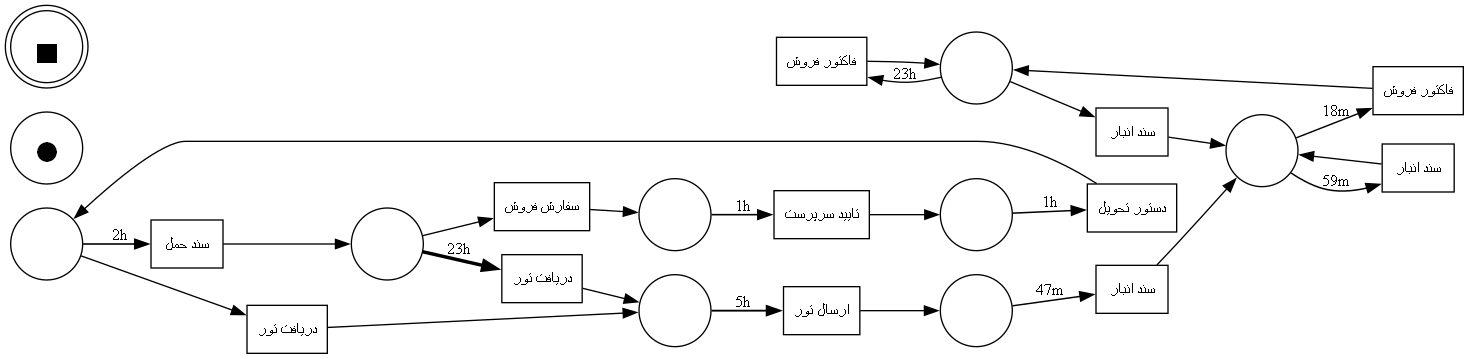

In [46]:
# Miner
dfg = dfg_discovery.apply(log, variant = dfg_discovery.Variants.PERFORMANCE)

# Convert
net, initial_marking, final_marking = dfg_converter.apply(dfg)

# GraphViz
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           variant = pn_visualizer.Variants.PERFORMANCE, 
                           log = log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/dfg_performance_petri.png')

# View
pn_visualizer.view(gviz)

<br></br>
#### <b>3.3.2.2. Frequency<b>

replaying log with TBR, completed variants ::   0%|          | 0/3 [00:00<?, ?it/s]

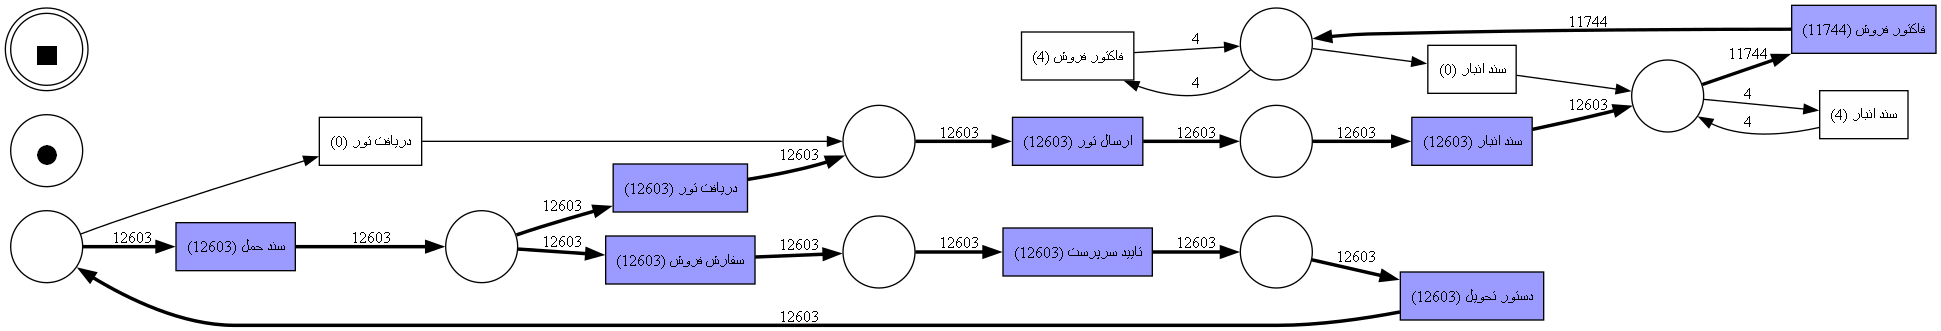

In [47]:
# Miner
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.FREQUENCY)

# Convert
net, initial_marking, final_marking = dfg_converter.apply(dfg)

# GraphViz
gviz = pn_visualizer.apply(net, initial_marking, final_marking,
                           variant = pn_visualizer.Variants.FREQUENCY, 
                           log = log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/dfg_frequency_petri.png')

# View
pn_visualizer.view(gviz)

<br></br>
## <b>3.4. Interactive Process Map</b>

In [48]:
def heuristics_process_model(dependency_threshold, and_threshold, loop_two_threshold):
    # Parameters
    parameters = heuristics_miner.Variants.CLASSIC.value.Parameters

    # Miner
    petri_net, initial_marking, final_marking = heuristics_miner.apply(
        log,
        variant=heuristics_miner.Variants.CLASSIC, 
        parameters={
            parameters.DEPENDENCY_THRESH: dependency_threshold, 
            parameters.AND_MEASURE_THRESH: and_threshold,
            parameters.LOOP_LENGTH_TWO_THRESH: loop_two_threshold
        }
    )

    # GraphViz
    gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking,
                               variant=pn_visualizer.Variants.FREQUENCY, 
                               log=log)
    
    # Save
    pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/heuristic_miner_4.png')
    
    # View
    vis_utils.view_image_in_jupyter(IMAGE_DIR / 'ProcessDiscovery/heuristic_miner_4.png')



interact(
    heuristics_process_model,

    dependency_threshold = widgets.FloatSlider(
        value=0.5, min=0, max=1, step=0.01, description='Dependency:', 
        disabled=False, continuous_update=False, orientation='horizontal', 
        readout=True, readout_format='.2f'
    ),

    and_threshold = widgets.FloatSlider(
        value=0.65, min=0, max=1, step=0.01, description='And:', 
        disabled=False, continuous_update=False, orientation='horizontal', 
        readout=True, readout_format='.2f'
    ),

    loop_two_threshold = widgets.FloatSlider(
        value=0.5, min=0, max=1, step=0.01, description='Loop Two:', 
        disabled=False, continuous_update=False, orientation='horizontal', 
        readout=True, readout_format='.2f'
    ),
)

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='Dependency:', max=1.0, step…

<function __main__.heuristics_process_model(dependency_threshold, and_threshold, loop_two_threshold)>

<br></br>
## <b>3.5. Correlation Miner</b>

In [50]:
df = log[["concept:name", "time:timestamp"]]

frequency_dfg, performance_dfg = correlation_miner.apply(df, parameters={"pm4py:param:activity_key": "concept:name",
                                                                         "pm4py:param:timestamp_key": "time:timestamp"})


In [79]:
activities_freq = dict(df["concept:name"].value_counts())
activities_freq

{'سند انبار': 12607,
 'سفارش فروش': 12603,
 'تاييد سرپرست': 12603,
 'دستور تحويل': 12603,
 'سند حمل': 12603,
 'دريافت تور': 12603,
 'ارسال تور': 12603,
 'فاکتور فروش': 11748}

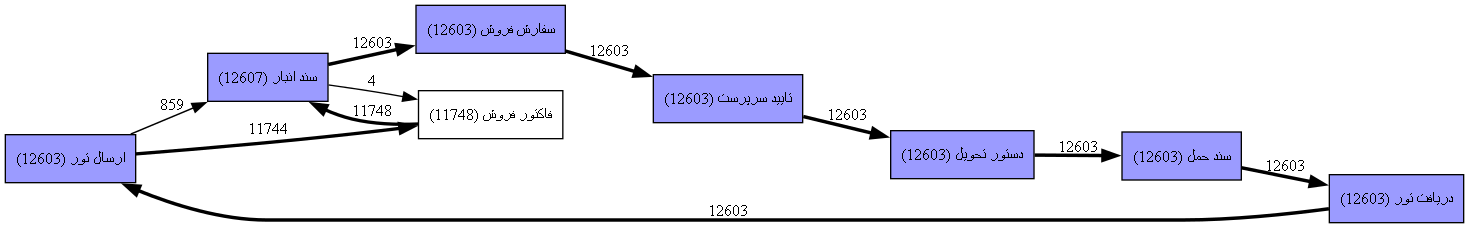

In [82]:
gviz_freq = dfg_visualizer.apply(frequency_dfg, variant=dfg_visualizer.Variants.FREQUENCY, activities_count=activities_freq)
dfg_visualizer.view(gviz_freq)

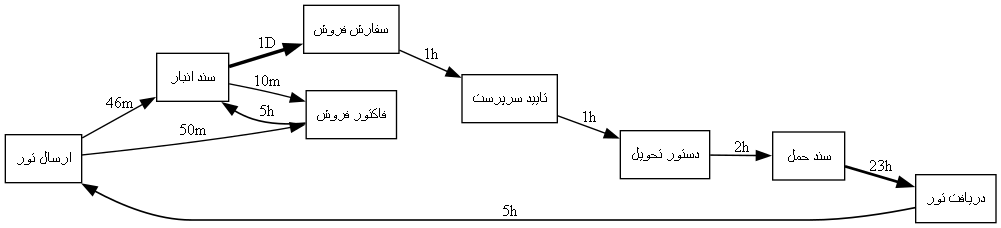

In [83]:
gviz_perf = dfg_visualizer.apply(performance_dfg, variant=dfg_visualizer.Variants.PERFORMANCE, activities_count=activities_freq)
dfg_visualizer.view(gviz_perf)

<br></br>

## <b>3.6. Temporal Profile</b>

In [54]:
emporal_profile = temporal_profile_discovery.apply(log)
emporal_profile

{('ارسال تور', 'سند انبار'): (2877.7685412865867, 5227.366631937783),
 ('ارسال تور', 'فاکتور فروش'): (4049.954204971059, 21435.017056852987),
 ('تاييد سرپرست', 'ارسال تور'): (119597.07942553361, 69324.90365247872),
 ('تاييد سرپرست', 'دريافت تور'): (98729.09934142664, 70930.3234509889),
 ('تاييد سرپرست', 'دستور تحويل'): (4216.977783067524, 13114.719444056604),
 ('تاييد سرپرست', 'سند انبار'): (122462.7242008408, 69041.85017658824),
 ('تاييد سرپرست', 'سند حمل'): (14126.327353548182, 19102.601428480808),
 ('تاييد سرپرست', 'فاکتور فروش'): (123246.73510384746, 71729.08133257506),
 ('دريافت تور', 'ارسال تور'): (20867.98008410696, 17001.658656436695),
 ('دريافت تور', 'سند انبار'): (23744.97096850956, 17734.234957763347),
 ('دريافت تور', 'فاکتور فروش'): (24817.871297242084, 27174.965467095913),
 ('دستور تحويل', 'ارسال تور'): (115380.10164246608, 67986.86630106253),
 ('دستور تحويل', 'دريافت تور'): (94512.12155835913, 69643.19713595163),
 ('دستور تحويل', 'سند انبار'): (118246.99888950583, 67715.5

<br></br>
# <b>Resources:</b>
- PM4PY [documentation](https://pm4py.fit.fraunhofer.de/documentation)
- PM4Py [documentation](http://pm4py.pads.rwth-aachen.de/documentation/) (older version)
- Towards Data Science story [Introduction to Process Mining](https://towardsdatascience.com/introduction-to-process-mining-5f4ce985b7e5)
- Process Mining for Python on [Youtube](https://www.youtube.com/channel/UCRcgOKrDsntrTI78RXXliuw/videos)
- Wikipedia page [process mining](https://en.wikipedia.org/wiki/Process_mining)
- Wikipedia page [Petri net](https://en.wikipedia.org/wiki/Petri_net)
- Alpha Miner [video](https://www.futurelearn.com/info/courses/process-mining/0/steps/15636)
- Heuristics Miner [video](https://www.futurelearn.com/info/courses/process-mining/0/steps/15639)
- Inductive Miner [video](https://www.futurelearn.com/info/courses/process-mining/0/steps/15642)
- Workflow Net and Soundness [video](https://www.coursera.org/lecture/process-mining/2-5-workflow-nets-and-soundness-tBnqo)
- Process Mining Manifestio ([pdf-document](https://www.win.tue.nl/ieeetfpm/downloads/Process%20Mining%20Manifesto.pdf))
- Data Mining [Event Logs](https://data.4tu.nl/search?q=BPI)
